# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# read data and display it

In [2]:
df=pd.read_csv(r'C:\Users\IShop\Desktop\Social_Network_Ads.csv')
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [3]:
df.shape

(400, 3)

# details about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
df.describe()


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
def data_info(df):
    integer_col=df.select_dtypes(include='int')
    data_summary={'mean':np.mean(integer_col,axis=0),'median':np.median(integer_col,axis=0),'max':np.max(integer_col,axis=0),'min':np.min(integer_col,axis=0),'std':np.std(integer_col,axis=0)}
    return pd.DataFrame(data_summary)
data_summary=data_info(df)
data_summary

,mean,median,max,min,std
Age,37.6550,37.0,60,18,10.469765
EstimatedSalary,69742.5000,70000.0,150000,15000,34054.312410
Purchased,0.3575,0.0,1,0,0.479264


# clean the data

In [7]:
handel_method=input("enter your handel method [drop/mean] : ")
def handel_func(df,handel_method):
    integer_col=df.select_dtypes(include='int')
    if handel_method=='mean':
        return df.fillna(integer_col.mean())
    elif handel_method=='drop':
        return df.dropna()
    else:
        print("you are not select the method")
cleand_data=handel_func(df,handel_method)
cleand_data

enter your handel method [drop/mean] : drop


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [8]:
df.drop_duplicates(df)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# data preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
data_type=df.dtypes
categorical=data_type[data_type=='object'].index.tolist()
label_encoder=LabelEncoder()
for column in categorical:
    df[column]=label_encoder.fit_transform(df[column])
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


-Label Encoder

In [10]:
data_type=df.dtypes
categorical=data_type[data_type=='object'].index.tolist()
encoded_df=pd.get_dummies(df,columns=categorical)
encoded_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


-One Hot Encoder

# feature selection

In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]   

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaled_df=std.fit_transform(x)
scaled_df  

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_df,y,test_size=0.2,random_state=30)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
rf=RandomForestRegressor(n_estimators=100,random_state=30)
rf.fit(x_train,y_train)
important_features=rf.feature_importances_
sorted_indices=np.argsort(important_features)[::-1]
num_of_features=6
selected_features=df.columns[sorted_indices[:num_of_features]]
selected_features

Index(['Age', 'EstimatedSalary'], dtype='object')

# classification models

In [15]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [16]:
lg.fit(x_train,y_train)

LogisticRegression()

In [17]:
train_preds=lg.predict(x_train)
predictions=lg.predict(x_test)
train_preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [18]:
from sklearn.metrics import accuracy_score , confusion_matrix
acc=accuracy_score(predictions,y_test)
acc
print('the accuracy test for your model : ', acc)

conf=confusion_matrix(predictions,y_test)
print('the confusin matrix test for your model : ', conf)


the accuracy test for your model :  0.8625
the confusin matrix test for your model :  [[49 11]
 [ 0 20]]


-Logistic Regression Model

In [19]:
from sklearn.svm import SVC

svm_model=SVC()

In [20]:
svm_model.fit(x_train,y_train)

SVC()

In [21]:
predictions=svm_model.predict(x_test)
train_preds

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [22]:
for k in ['linear','rbf','poly']:
    svm_model=SVC(kernel=k)
    print('your kernal is :' , k)
    acc=accuracy_score(train_preds,y_train)
    acc
    print('the accuracy train for your model : ', acc)

    conf=confusion_matrix(train_preds,y_train)
    print('the confusin matrix train for your model : ', conf)
    print('----------------')


your kernal is : linear
the accuracy train for your model :  0.834375
the confusin matrix train for your model :  [[190  35]
 [ 18  77]]
----------------
your kernal is : rbf
the accuracy train for your model :  0.834375
the confusin matrix train for your model :  [[190  35]
 [ 18  77]]
----------------
your kernal is : poly
the accuracy train for your model :  0.834375
the confusin matrix train for your model :  [[190  35]
 [ 18  77]]
----------------


In [23]:
for k in ['linear','rbf','poly']:
    svm_model=SVC(kernel=k)
    print('your kernal is :' , k)
    acc=accuracy_score(y_test,predictions)
    acc
    print('the accuracy test for your model : ', acc)

    conf=confusion_matrix(y_test,predictions)
    print('the confusin matrix test for your model : ', conf)
    print('----------------')


your kernal is : linear
the accuracy test for your model :  0.95
the confusin matrix test for your model :  [[49  0]
 [ 4 27]]
----------------
your kernal is : rbf
the accuracy test for your model :  0.95
the confusin matrix test for your model :  [[49  0]
 [ 4 27]]
----------------
your kernal is : poly
the accuracy test for your model :  0.95
the confusin matrix test for your model :  [[49  0]
 [ 4 27]]
----------------


-Support Vector Machine

# regression models

In [24]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [25]:
linear_model.fit(x_train,y_train)
predictions=linear_model.predict(x_test)
predictions

array([ 0.12173376,  0.8910921 ,  0.24622456,  0.01181874,  0.46973949,
        0.31213146,  0.59432389,  0.75906773,  0.4697161 , -0.0248196 ,
       -0.3180199 ,  0.05561629,  0.22420881,  0.23890158,  0.05925439,
        0.02634773,  0.15466381,  0.09955422,  0.78871064,  0.4110152 ,
        0.28283951, -0.10924454, -0.10912755,  0.91683954,  0.36353276,
        0.16184642,  0.47720286,  0.44056452,  0.29366021,  0.32318613,
       -0.13128369,  0.51712835,  0.69691591,  0.35984787,  0.02639453,
        0.48454925, -0.01404569,  0.68590804,  0.51379441, -0.14942739,
        0.32323293,  0.41470009,  0.29748548,  0.68245711,  0.01526966,
        0.09230142,  0.08490825,  0.36343917,  0.43678604,  0.50649482,
       -0.15308888,  0.13985406,  0.33783211, -0.22284445,  0.32318613,
        1.00823651,  0.31926728,  0.5138412 ,  0.43673925, -0.17510464,
        0.48058359,  0.01181874,  0.21315413,  0.70043703,  0.33414722,
        0.28664138,  0.33048573,  1.00821312,  0.38545493,  0.40

In [26]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,predictions)
print('the least mean square erorr : ', MSE)

the least mean square erorr :  0.11198971964362567


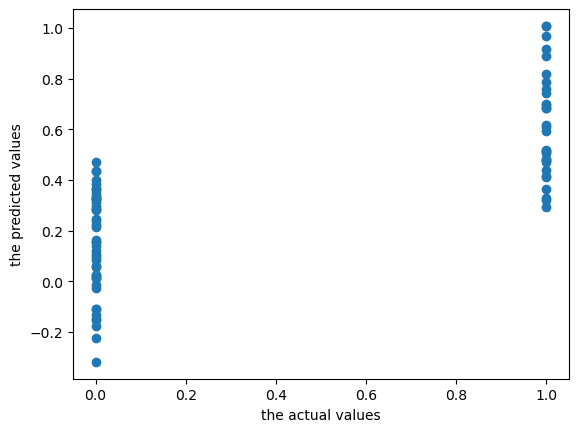

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel('the actual values')
plt.ylabel('the predicted values')
plt.show()

-Regression Model

# clustring models

In [28]:
from sklearn.cluster import KMeans
km=KMeans()
km.fit(x_train,y_train)

C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [29]:
predictions=km.predict(x_test)
predictions

array([2, 3, 2, 6, 5, 5, 5, 4, 5, 6, 6, 7, 5, 2, 7, 7, 2, 7, 0, 1, 5, 7,
       6, 3, 2, 7, 0, 0, 1, 5, 7, 1, 3, 5, 2, 0, 7, 3, 0, 6, 2, 5, 5, 0,
       7, 7, 7, 5, 5, 0, 6, 7, 5, 6, 5, 4, 1, 0, 5, 6, 1, 6, 7, 4, 5, 2,
       5, 4, 5, 5, 5, 7, 1, 0, 2, 5, 4, 5, 0, 0])

In [30]:
acc=accuracy_score(y_test,predictions)
print('the accuracy test for the model : ', acc)
conf=confusion_matrix(y_test,predictions)
print('the confusion matrix test for the model : ', conf)
#هنا عمل overfit لانها labeled data اصلا

the accuracy test for the model :  0.075
the confusion matrix test for the model :  [[ 0  0  9  0  0 17  9 14]
 [11  6  0  4  5  5  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


C:\Users\IShop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


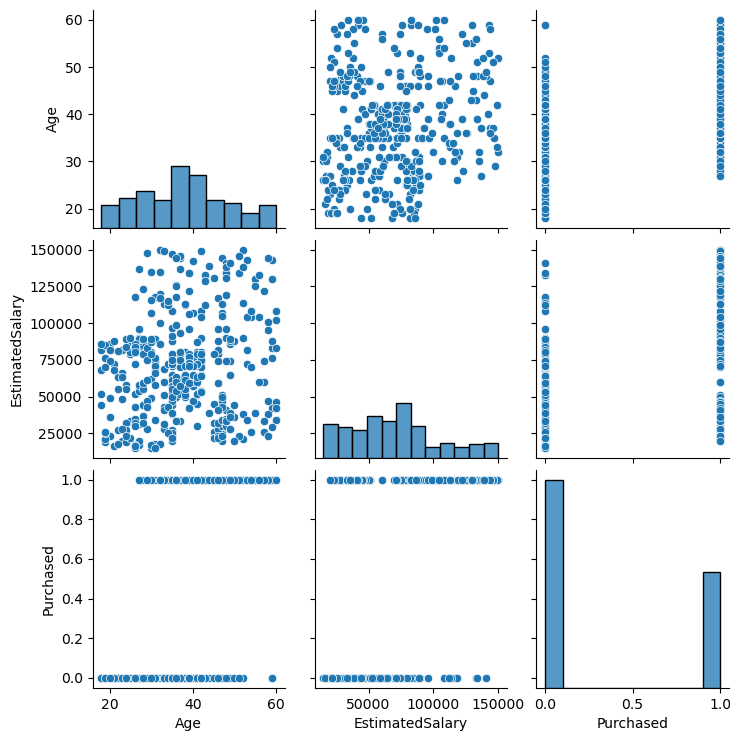

In [31]:
sns.pairplot(df)

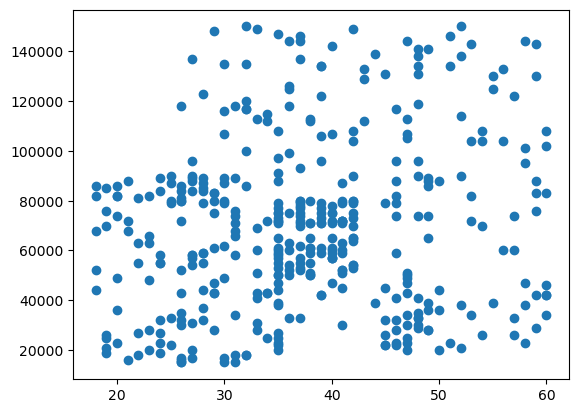

In [32]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [33]:
list_initia=[]
for n in range (1,10):
    km=KMeans(n_clusters=n)
    km.fit(df)
    list_initia.append(km.inertia_)
    print(n , km.inertia_)
#بيشوف بعد النقطة عن السنتر[elbow mothod]

C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1 463878521438.26733


C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 165197378649.81567


C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 59489963605.375336


C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4 33459749213.735886


C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 19983401111.887352


C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6 14684331959.75565


C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7 10128318693.401188


C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 8063513219.479098


C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9 6359628162.154556


-KMeans Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering()
predictions=agg.fit_predict(df)
predictions


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

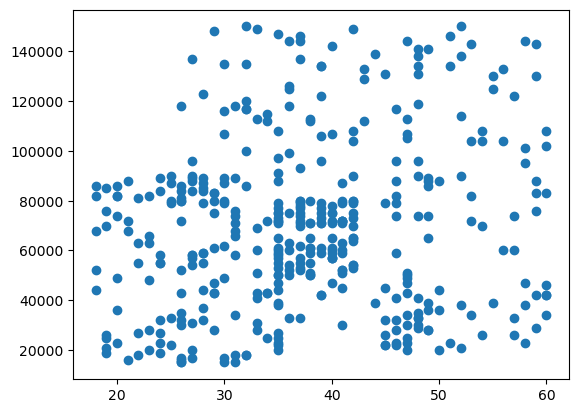

In [35]:
plt.scatter(df['Age'],df['EstimatedSalary'])

-Agglomerative Clustering

# make data balanced

In [36]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=30)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)


from imblearn.under_sampling import RandomUnderSampler
oversampler=RandomUnderSampler(random_state=30)

x_train_resampled,y_train_resampled=undersampling.fit_resample(x_train,y_train)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\IShop\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)